<a href="https://colab.research.google.com/github/sonicmortis/DIF62310_KelasB_25_2311532020/blob/main/DimensionalityReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
x = iris.data
y = iris.target

n_samples, n_features = x.shape

print(f"Number of samples: {n_samples}")
print(f"Number of features: {n_features}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(nrows = n_features, ncols = n_features, figsize = (8, 8))
fig.tight_layout

names = iris.feature_names

for i, j in zip(*np.triu_indices_from(ax, k=1)):
  ax[j, i].scatter(x[:, j], x[:, i], c = y)
  ax[j, i].set_xlabel(names[j])
  ax[j, i].set_ylabel(names[i])
  ax[i, j].set_axis_off()

for i in range(n_features):
  ax[i, i].hist(x[:, i], color = 'grey')
  ax[i, i].set_ylabel('Count')
  ax[i, i].set_xlabel(names[i])
  ax[i, i].set_yticks([])
  ax[i, i].set_xticks([])



In [ ]:
def mean(x):
  return sum(x)/len(x)

def std(x):
  return (sum((i - mean(x))**2 for i in x)/len(x))**0.5

def Standardize_data(x):
  return (x - mean(x))/std(x)

X_std = Standardize_data(x)

In [ ]:
print(x)
print(X_std)

In [ ]:
def covariance(x):
  return (x.T @ x)/(x.shape[0] - 1)

cov_mat = covariance(X_std)

In [ ]:
cov_mat

In [ ]:
from numpy.linalg import eig

eig_vals, eig_vecs = eig(cov_mat)

max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
eig_vecs = eig_vecs*signs[np.newaxis,:]
eig_vecs = eig_vecs.T

print('Eigenvalues \n', eig_vals)
print('Eigenvectors \n', eig_vecs)

In [ ]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i, :]) for i in range(len(eig_vals))]

eig_pairs.sort(key=lambda x: x[0], reverse=True)

eig_vals_sorted = np.array([x[0] for x in eig_pairs])
eig_vecs_sorted = np.array([x[1] for x in eig_pairs])

eig_pairs

In [25]:
k = 2
W = eig_vecs_sorted[:k, :]

print(W.shape)

(2, 4)


Explained variance: [72.96 22.85  3.67  0.52]
Cumulative explained variance: [ 72.96  95.81  99.48 100.  ]


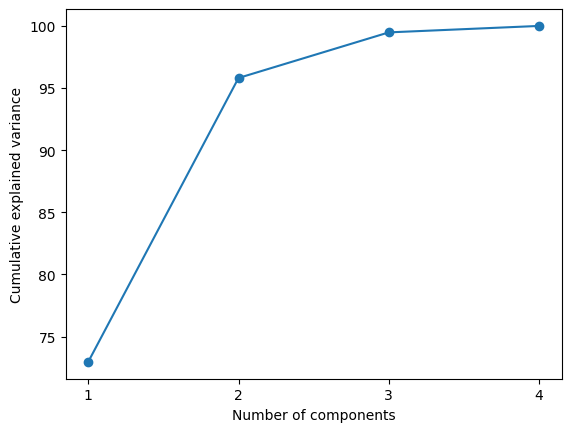

In [26]:
eig_vals_total  = sum(eig_vals)
explained_variance = [(i / eig_vals_total)*100 for i in eig_vals_sorted]
explained_variance = np.round(explained_variance, 2)
cum_explained_variance = np.cumsum(explained_variance)

print('Explained variance: {}'.format(explained_variance))
print('Cumulative explained variance: {}'.format(cum_explained_variance))

plt.plot(np.arange(1, n_features+1), cum_explained_variance, '-o')
plt.xticks(np.arange(1, n_features+1))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [27]:
X_proj = X_std.dot(W.T)

print(X_proj.shape)
print(X.shape)

(150, 2)
(150, 4)


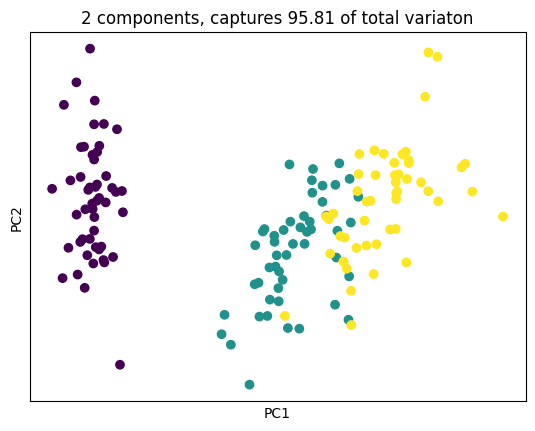

In [29]:
plt.scatter(X_proj[:, 0], X_proj[:, 1], c = y)
plt.xlabel('PC1'); plt.xticks([])
plt.ylabel('PC2'); plt.yticks([])
plt.title('2 components, captures {} of total variaton'.format(cum_explained_variance[1]))
plt.show()